# 1.0 - Investigating term frequency graph and Generating a word cloud for frequent terms

In [2]:
import pandas as pd
from IPython.core.display import display
df = pd.read_csv('../data/interim/ecommerce_data-cleaned-0.2.3.csv', index_col=0)
df.head()


,brand,name,description,category_raw,price_raw,discount_raw
0,La Costeï¿½ï¿½a,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",31.93,31.93
1,Equate,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Health | Equate | Equate Allergy | Equate Sinu...,10.48,10.48
2,AduroSmart ERIA,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,Electronics | Smart Home | Smart Energy and Li...,10.99,10.99
3,lowrider,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Accessories |...,38.59,38.59
4,Anself,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Baby | Feeding | Sippy Cups: Alternatives to P...,5.81,5.81


In [3]:
# Setup constants.
DATA_DIR = "./../data/interim/"
BASENAME = "ecommerce_data-cleaned-0.2.3"
EXT = "csv"

## 1.1 - Text Preprocessing and adding Classification Labels

Now we will remove punctuation, numbers and special characters from the name column as
we need to use the keywords from it in our classifier. All the words will be converted into lower-case for uniformity 
and stemmed using NLTK package's Porter Stemmer. This is done to reduce the size of vocabulary space and improve volume
of feature space. 

Additionally, we will add a column with the integer labels for list price classification to the data frame.

In [4]:
import pandas as pd
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle

stemmer = PorterStemmer()
words = stopwords.words("english")

df = pd.read_csv('../data/interim/ecommerce_data-cleaned-0.2.3.csv', index_col=0)

def get_range_label(price):
    value = np.round(price, decimals=1)
    if value <= 10:
        return 0
    elif 10 < value <= 20:
        return 1
    elif 20 < value <= 25:
        return 2
    elif 25 < value <= 30:
        return 3
    elif 30 < value <= 35:
        return 4
    elif 35 < value <= 40:
        return 5
    elif 40 < value <= 45:
        return 6
    elif 45 < value <= 50:
        return 7
    elif 50 < value <= 100:
        return 8
    else:
        return 9

df['labels'] = df['price_raw'].apply(lambda x: get_range_label(x))
display(df)

df['cleaned_name'] = df.name.apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df.head()
display(df)

vectorizer = TfidfVectorizer(min_df= 5, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned_name']).toarray()
final_features.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sheenambhatia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,brand,name,description,category_raw,price_raw,discount_raw,labels
0,La Costeï¿½ï¿½a,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",31.93,31.93,4
1,Equate,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Health | Equate | Equate Allergy | Equate Sinu...,10.48,10.48,1
2,AduroSmart ERIA,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,Electronics | Smart Home | Smart Energy and Li...,10.99,10.99,1
3,lowrider,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Accessories |...,38.59,38.59,5
4,Anself,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Baby | Feeding | Sippy Cups: Alternatives to P...,5.81,5.81,0
...,...,...,...,...,...,...,...
29994,NineChef,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,We aim to show you accurate product informati...,"Food | Snacks, Cookies & Chips | Chips & Crisp...",45.99,45.99,7
29996,Shock Sox,Shock Sox Fork Seal Guards 29-36mm Fork Tube 4...,We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Components | ...,33.25,33.25,4
29997,Princes,Princes Gooseberries 300g,We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",8.88,8.88,0
29998,Create Ion,Create Ion Grace 3/4 Inches Straight Hair Iron...,We aim to show you accurate product informati...,Beauty | Hair Care | Hair Styling Tools | Flat...,50.00,24.50,7


,brand,name,description,category_raw,price_raw,discount_raw,labels,cleaned_name
0,La Costeï¿½ï¿½a,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",31.93,31.93,4,la costena chipotl pepper oz pack
1,Equate,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Health | Equate | Equate Allergy | Equate Sinu...,10.48,10.48,1,equat triamcinolon acetonid nasal allergi spra...
2,AduroSmart ERIA,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,Electronics | Smart Home | Smart Energy and Li...,10.99,10.99,1,adurosmart eria soft white smart a light bulb ...
3,lowrider,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Accessories |...,38.59,38.59,5,classic adjust balloon fender set chrome bicyc...
4,Anself,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Baby | Feeding | Sippy Cups: Alternatives to P...,5.81,5.81,0,eleph shape silicon drinkwar portabl silicon c...
...,...,...,...,...,...,...,...,...
29994,NineChef,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,We aim to show you accurate product informati...,"Food | Snacks, Cookies & Chips | Chips & Crisp...",45.99,45.99,7,sheng xiang zhen shengxiangzhen snack onenin c...
29996,Shock Sox,Shock Sox Fork Seal Guards 29-36mm Fork Tube 4...,We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Components | ...,33.25,33.25,4,shock sox fork seal guard mm fork tube green y...
29997,Princes,Princes Gooseberries 300g,We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",8.88,8.88,0,princ gooseberri g
29998,Create Ion,Create Ion Grace 3/4 Inches Straight Hair Iron...,We aim to show you accurate product informati...,Beauty | Hair Care | Hair Styling Tools | Flat...,50.00,24.50,7,creat ion grace inch straight hair iron ci r


(29602, 11892)

## 1.2 - Investigating the term frequency of the predictor - 'cleaned_name'.

In [5]:
terms = df['cleaned_name']
print(terms)

print('\n\nTerm Frequency for all words in \'cleaned_name\':')

term_frequency = terms.str.split(expand=True).stack().value_counts()
print(term_frequency)

0                        la costena chipotl pepper oz pack
1        equat triamcinolon acetonid nasal allergi spra...
2        adurosmart eria soft white smart a light bulb ...
3        classic adjust balloon fender set chrome bicyc...
4        eleph shape silicon drinkwar portabl silicon c...
                               ...                        
29994    sheng xiang zhen shengxiangzhen snack onenin c...
29996    shock sox fork seal guard mm fork tube green y...
29997                                   princ gooseberri g
29998         creat ion grace inch straight hair iron ci r
29999    green bell takuminowaza two way ear pick brass...
Name: cleaned_name, Length: 29602, dtype: object


Term Frequency for all words in 'cleaned_name':
oz              5501
pack            4628
x               1940
black           1789
babi            1680
                ... 
rosanna            1
wdth               1
zaditor            1
berten             1
takuminowaza       1
Length: 19272, dtype:

## 1.3 - But this prints the term frequency for every term in the attribute 'cleaned_name'. Let's try to find the term frequency for the top 20 most frequent terms.

In [6]:
top_N = 20

term_frequency_TopN = terms.str.split(expand=True).stack().value_counts()[:top_N]

print('\n\nTerm Frequency for top '+str(top_N)+' most frequent terms in \'cleaned_name\':')
print(term_frequency_TopN)

# print(type(term_frequency_TopN))



Term Frequency for top 20 most frequent terms in 'cleaned_name':
oz        5501
pack      4628
x         1940
black     1789
babi      1680
bike      1506
white     1295
set       1292
bag       1171
men       1131
golf      1032
bicycl    1016
blue       956
w          926
sport      923
size       921
count      913
light      894
natur      856
women      820
dtype: int64


## 1.4 - Creating a histogram of the term frequency for a better visualization

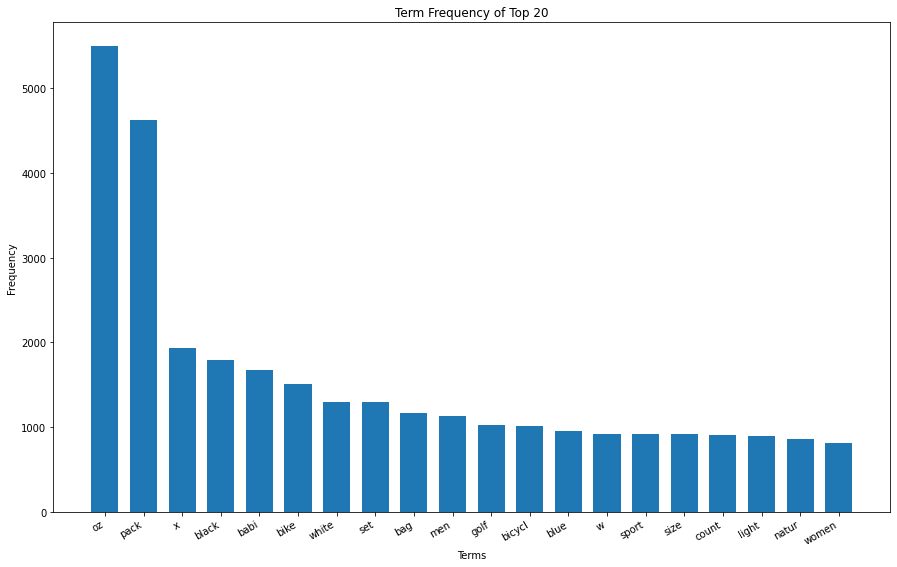

In [7]:
import matplotlib.pyplot as plt

X_axis_terms = term_frequency_TopN.keys()
Y_axis_frequency = term_frequency_TopN
indexes = np.arange(len(X_axis_terms))
# width = 0.7
plt.figure(figsize=(15,10))
plt.bar(indexes, Y_axis_frequency, 0.7)
# plt.xticks(indexes, X_axis_terms, rotation=120, fontweight='light', fontsize='x-small')
plt.xticks(indexes, X_axis_terms, rotation=45)
plt.title("Term Frequency of Top 20")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.gcf().autofmt_xdate()
plt.show()

## 1.5 - Generating a word cloud of the Top 100 most frequent words

                      term  frequency
oz                      oz       5501
pack                  pack       4628
x                        x       1940
black                black       1789
babi                  babi       1680
...                    ...        ...
rosanna            rosanna          1
wdth                  wdth          1
zaditor            zaditor          1
berten              berten          1
takuminowaza  takuminowaza          1

[19272 rows x 2 columns]


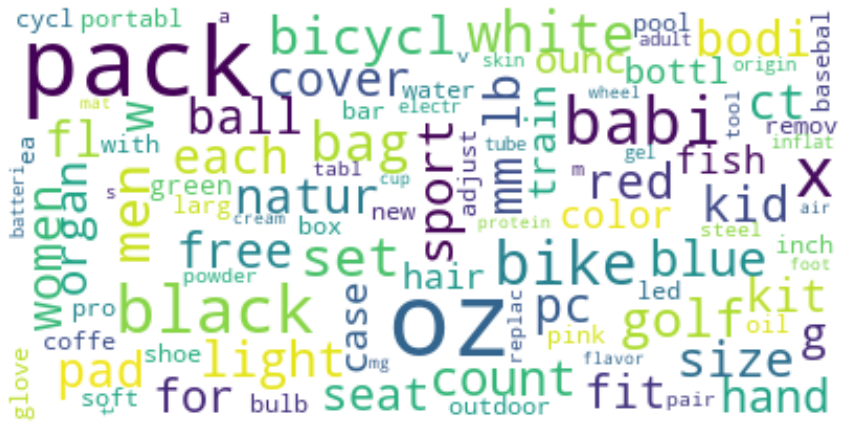

In [16]:
from wordcloud import WordCloud

frequency_terms = term_frequency.to_frame()
frequency_terms['term'] = frequency_terms.index
frequency_terms['frequency'] = frequency_terms[0]
frequency_terms = frequency_terms.iloc[: , 1:]
# frequency_terms.rename(columns={'0': 'frequency', 'term':'term'})
print(frequency_terms)

data = dict(zip(frequency_terms['term'].tolist(), frequency_terms['frequency'].tolist()))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()